In [32]:
#I experimented with changing the model to evaluate only Houses and not units or townhouses but it didnt make much difference 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#Reads data from Melbourne Housing and Poperty Sales of Melbourne City. Sources claim to be scrapped from domain.com
dataset1 = pd.read_csv("datasets/Melbourne_housing_FULL.csv")
dataset2 = pd.read_csv("datasets/PSMS.csv")

In [34]:
#Takes our two datasets and merges them together into one. Then looking at any Null values and deciding how to handle them. 
Merged_Data = pd.merge(dataset1,dataset2,how='outer')
Merged_Data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             2
Postcode             2
Bedroom2         11686
Bathroom         11697
Car              12304
Landsize         16603
BuildingArea     31749
YearBuilt        28744
CouncilArea       6166
Lattitude        11308
Longtitude       11308
Regionname           4
Propertycount        4
KeyID            34857
dtype: int64

In [35]:
# Assuming 'category_column' contains the values 'H', 'U', 'T'

df_H = Merged_Data[Merged_Data['Type'] == 'h']  # Dataset for 'H'
df_U = Merged_Data[Merged_Data['Type'] == 'u']  # Dataset for 'U'
df_T = Merged_Data[Merged_Data['Type'] == 't']  # Dataset for 'T'


In [36]:
#Exploring the shape of our initial dataset. Output shows that our intial dataset has 53K rows. Our previous exploration into NaN values shows that a lot of values are missing for our data. 
df_H

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,KeyID
0,Abbotsford,1 Paterson St,2,h,1075000.0,S,Biggin,14/10/2017,3.0,3067.0,...,0.0,NaN,92.0,1927.0,Yarra City Council,-37.80318,145.00067,Northern Metropolitan,4019.0,NaN
1,Abbotsford,1/1 Mayfield St,3,h,NaN,SP,Nelson,18/03/2017,2.5,3067.0,...,1.0,119.0,167.0,2005.0,Yarra City Council,-37.80820,144.99990,Northern Metropolitan,4019.0,NaN
8,Abbotsford,10 James St,2,h,940000.0,S,Biggin,12/08/2017,3.0,3067.0,...,0.0,424.0,NaN,NaN,Yarra,-37.80911,144.99339,Northern Metropolitan,4019.0,17837.0
9,Abbotsford,10 James St,2,h,940000.0,S,Biggin,12/08/2017,3.0,3067.0,...,0.0,424.0,NaN,NaN,Yarra City Council,-37.80911,144.99339,Northern Metropolitan,4019.0,NaN
10,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4019.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53247,Yarraville,96 Pentland Pde,3,h,1100000.0,VB,hockingstuart,9/09/2017,6.3,3013.0,...,0.0,221.0,137.0,1948.0,Maribyrnong City Council,-37.81284,144.89159,Western Metropolitan,6543.0,NaN
53248,Yarraville,96 Pentland Pde,3,h,1100000.0,VB,hockingstuart,9/09/2017,6.3,3013.0,...,0.0,221.0,137.0,1948.0,NaN,-37.81284,144.89159,Western Metropolitan,6543.0,20905.0
53249,Yarraville,98 Powell St,4,h,NaN,SP,Greg,7/05/2016,7.0,3013.0,...,2.0,476.0,NaN,NaN,Maribyrnong City Council,-37.82010,144.88430,Western Metropolitan,6543.0,NaN
53250,croydon,81 hull Rd,3,h,730000.0,S,Ray,26/08/2017,23.0,3136.0,...,NaN,NaN,NaN,NaN,Maroondah City Council,NaN,NaN,Eastern Metropolitan,11925.0,NaN


In [55]:
#Dropping irrellevant columns that we think dont correlate to price. 
#We are doing this now to hopefully thing down the amount of potential NaN values in our dataset which we will remove in the next step.
# Also we will drop any duplicates. This narrows our dataset to 33K values. 
Data = df_H.drop(["Date","Lattitude","Type", "Suburb", "KeyID","Address", "Method", "SellerG","Postcode", "CouncilArea", "YearBuilt", "Propertycount"], axis = 1)
Data.drop_duplicates(inplace = True)
Data

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Longtitude,Regionname
0,2,1075000.0,3.0,2.0,1.0,0.0,NaN,92.0,145.00067,Northern Metropolitan
1,3,NaN,2.5,3.0,2.0,1.0,119.0,167.0,144.99990,Northern Metropolitan
8,2,940000.0,3.0,2.0,1.0,0.0,424.0,NaN,144.99339,Northern Metropolitan
10,2,1097000.0,2.5,3.0,1.0,2.0,220.0,75.0,144.99890,Northern Metropolitan
13,2,911000.0,3.0,2.0,1.0,0.0,141.0,NaN,144.99499,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...
53242,2,950000.0,7.0,2.0,1.0,0.0,94.0,NaN,144.88800,Western Metropolitan
53244,3,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan
53245,2,820000.0,7.0,2.0,1.0,0.0,211.0,NaN,144.88650,Western Metropolitan
53247,3,1100000.0,6.3,3.0,1.0,0.0,221.0,137.0,144.89159,Western Metropolitan


In [56]:
#We want to drop any Not a number values from our dataset but doing so now will leave us with only 9K values to train our model off. 
# Let's look at where these NaN values are coming from again
Data.isnull().sum()

Rooms               0
Price            5092
Distance            1
Bedroom2         3082
Bathroom         3088
Car              3572
Landsize         5804
BuildingArea    13081
Longtitude       2964
Regionname          2
dtype: int64

In [39]:
#Notice 20K values dont have a building area and 10K havent got a landsize. These are definitely correlative to price but we cant use them. 
# We could use the average, but for a dataset like ours the range is much to large and would give us a lot of inaccurate rows. 

#Data.drop(["BuildingArea"], axis='columns', inplace=True)
#Data.isnull().sum()


In [57]:
# Instead lets try and use K-means nearest neighbour method that will fill missing values based on similar rows in the dataset. 
from sklearn.impute import KNNImputer

Missing_Columns = ['Landsize', 'Bedroom2', 'Rooms', 'BuildingArea']
imputer = KNNImputer(n_neighbors=5)
DataSubset = Data[Missing_Columns]
Data_imputed = imputer.fit_transform(DataSubset)
Data_imputed = pd.DataFrame(Data_imputed, columns=Missing_Columns)
Data['BuildingArea'] = Data['BuildingArea'].fillna(Data_imputed['BuildingArea'])



In [58]:
#The good news is that we successfully recovered about 13 thousand values from the BuildingArea column, lets do the other important columns now too. 
Data.isnull().sum()


Rooms              0
Price           5092
Distance           1
Bedroom2        3082
Bathroom        3088
Car             3572
Landsize        5804
BuildingArea    7278
Longtitude      2964
Regionname         2
dtype: int64

In [59]:
SimilarFeatures = ['Landsize', 'Bedroom2', 'Rooms', 'BuildingArea']
imputer = KNNImputer(n_neighbors=5)
DataSubset = Data[SimilarFeatures]
Data_imputed = imputer.fit_transform(DataSubset)
Data_imputed = pd.DataFrame(Data_imputed, columns=Missing_Columns)
Data['Landsize'] = Data['Landsize'].fillna(Data_imputed['Landsize'])



In [60]:
# We recovered another 7k values. 
Data.isnull().sum()


Rooms              0
Price           5092
Distance           1
Bedroom2        3082
Bathroom        3088
Car             3572
Landsize        3251
BuildingArea    7278
Longtitude      2964
Regionname         2
dtype: int64

In [61]:
#Now let's drop the NaN values. By using the K-Nearest method to fill in some missing values we improved the volume of data to train our dataset on. 

Cleaned_data = Data.dropna()
Cleaned_data.shape

(10520, 10)

In [62]:
#We could encode the suburb into a binary format. probably a better way to do this but not sure. Location is surely correlated to price. Perhaps we should use distance to CBD instead?
Cleaned_data = pd.get_dummies(Cleaned_data, columns = ["Regionname"]) 

In [63]:
from sklearn.model_selection import train_test_split
X = Cleaned_data.drop(['Price'], axis = 1)
Y = Cleaned_data['Price']

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [65]:
#Joining the training data back together. 
train_data = X_train.join(Y_train)

<Axes: >

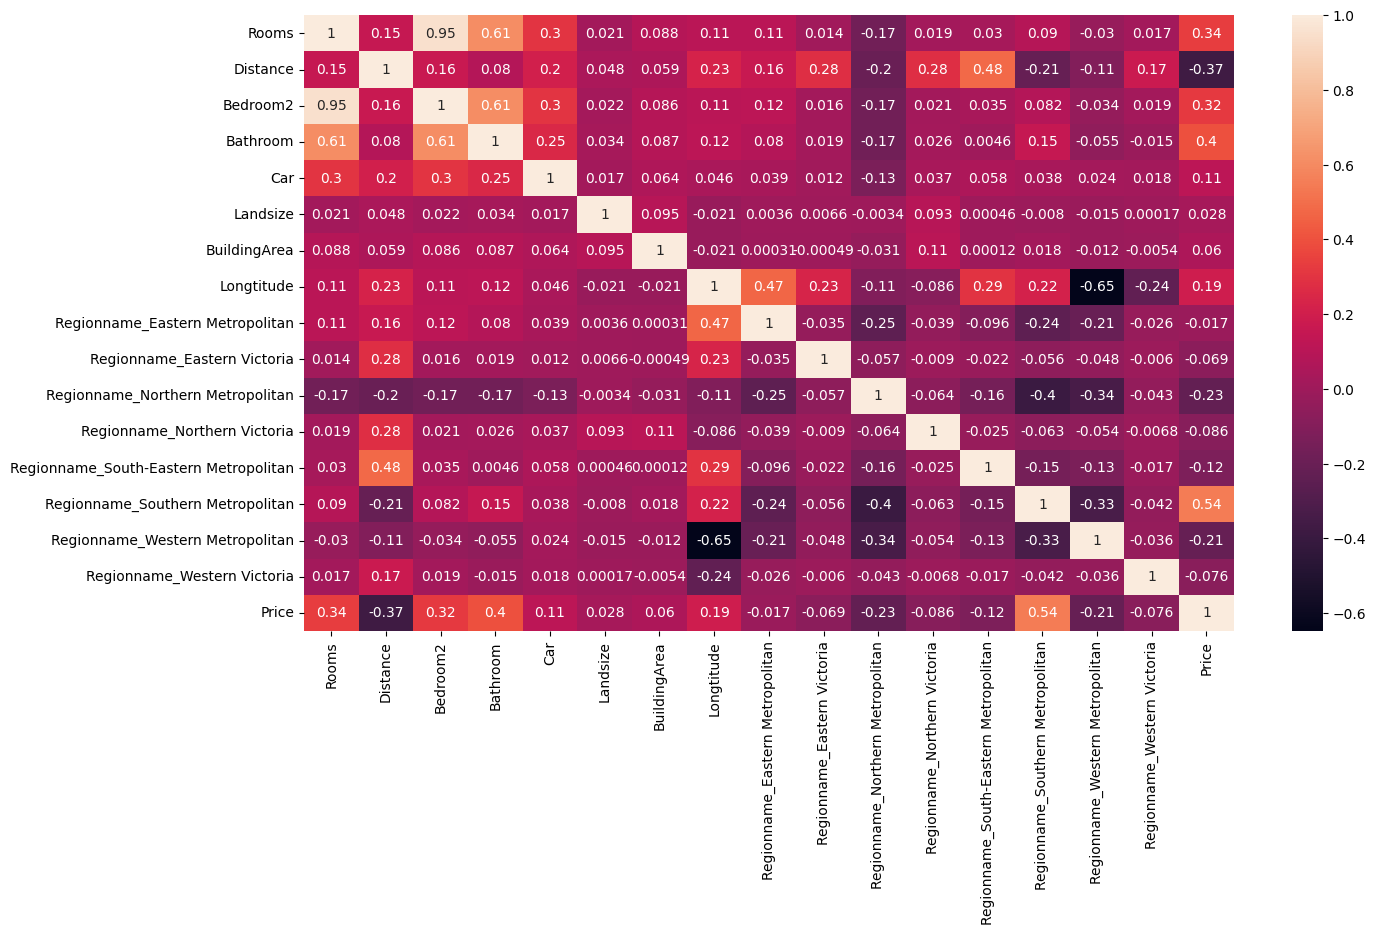

In [66]:
#Lets look at how different variables correlate to price. Seaborn heatmap is a great way to view this.   
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True)

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Bedroom2'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

<Figure size 2500x1000 with 0 Axes>

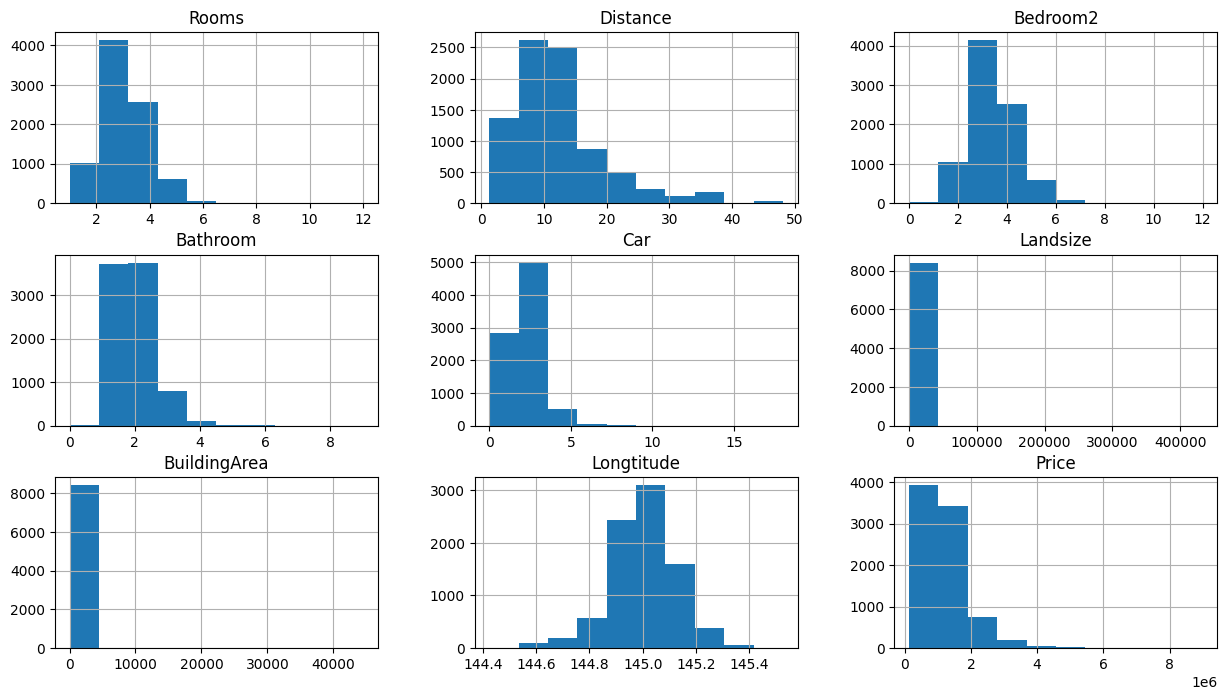

In [67]:
#Features are somewhat skewed, ideally we want a bell curve type distubtion 
plt.figure(figsize=(25,10))
train_data.hist(figsize=(15,8))

In [68]:
#Normalising data using logirithms. 
train_data['Rooms'] = np.log (train_data['Rooms']+1)
train_data['Distance'] = np.log (train_data['Distance']+1)
train_data['Price'] = np.log (train_data['Price']+1)
train_data['Bedroom2'] = np.log (train_data['Bedroom2']+1)
train_data['Landsize'] = np.log (train_data['Landsize']+1)
train_data['BuildingArea'] = np.log (train_data['BuildingArea']+1)
train_data['Longtitude'] = np.log (train_data['Longtitude']+1)
train_data['Car'] = np.log (train_data['Car']+1)
train_data['Bathroom'] = np.log (train_data['Bathroom']+1)




array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Bedroom2'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

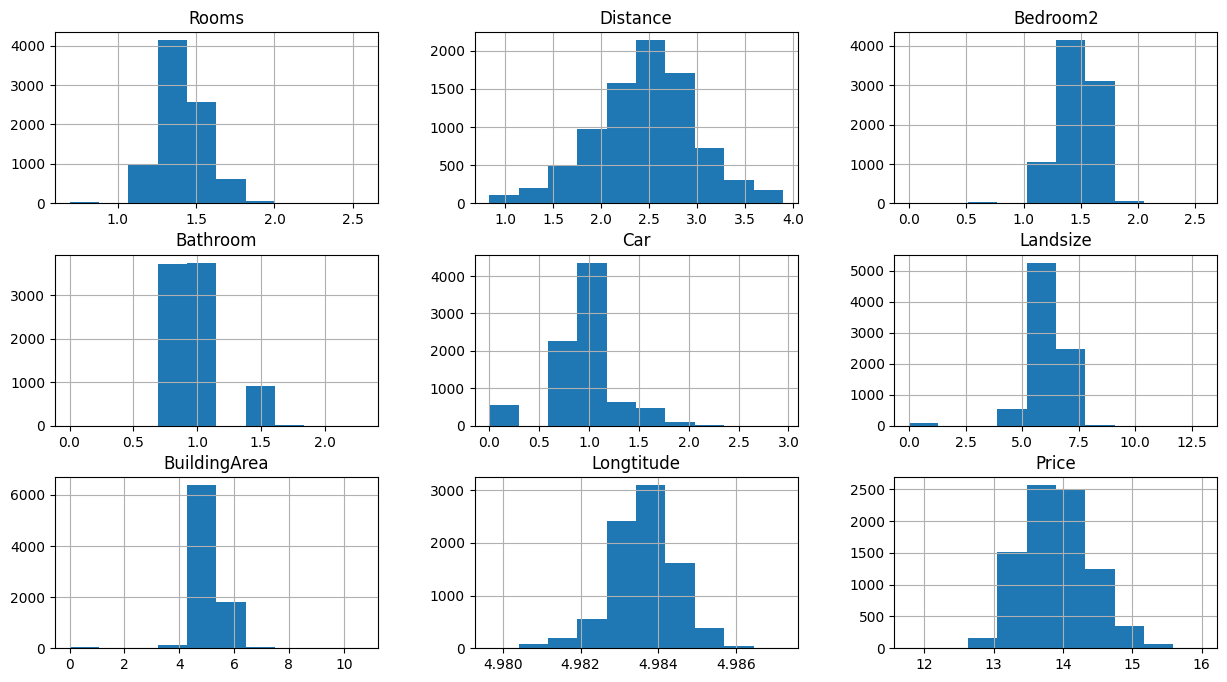

In [69]:
#Showing data after normalising with logarithms. 
train_data.hist(figsize=(15,8))

In [70]:
#Simple Linear Regression model, scaling our training data too. Then lastly fitting training data to line. 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
reg = LinearRegression()
scaler = StandardScaler()
X_train_s= scaler.fit_transform(X_train)
reg.fit(X_train_s,Y_train)

LinearRegression()

In [71]:
#Normalising our test data using logarithms. 
test_data = X_test.join(Y_test)

test_data['Rooms'] = np.log (test_data['Rooms']+1)
test_data['Distance'] = np.log (test_data['Distance']+1)
test_data['Price'] = np.log (test_data['Price']+1)
test_data['Bedroom2'] = np.log (test_data['Bedroom2']+1)
test_data['Landsize'] = np.log (test_data['Landsize']+1)
test_data['BuildingArea'] = np.log (test_data['BuildingArea']+1)
test_data['Landsize'] = np.log (test_data['Landsize']+1)
test_data['Car'] = np.log (test_data['Car']+1)
test_data['Bathroom'] = np.log (test_data['Bathroom']+1)

In [72]:
X_test_s = scaler.transform(X_test)

In [73]:
reg.score(X_test_s,Y_test)

0.552880908699338

In [74]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, Y_train)

RandomForestRegressor()

In [75]:
forest.score(X_test_s,Y_test)

0.7566040388723138

In [330]:
from sklearn.model_selection import GridSearchCV

grid = {
    "n_estimators": [3,10,30],
    "max_features": [2,4,6,8],
}

grid_search = GridSearchCV(forest,grid, cv = 5,
                           return_train_score= True,
                           scoring="neg_mean_squared_error")

grid_search.fit(X_train_s, Y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [331]:
best_forest = grid_search.best_estimator_
best_forest.score(X_test_s, Y_test)

0.7619751729009798